# Module 5 : Performance measurements of SMLT - Gait

In [1]:
# import library packages
import pandas as p
import matplotlib.pyplot as plt

import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = p.read_csv("g.csv")


In [4]:
dfg=df.dropna()


In [5]:
dfg.columns

Index(['Time(sec)', 'VGRF_left_s1', 'VGRF_left_s2', 'VGRF_left_s3',
       'VGRF_left_s4', 'VGRF_left_s5', 'VGRF_left_s6', 'VGRF_left_s7',
       'VGRF_left_s8', 'VGRF_right_s1', 'VGRF_right_s2', 'VGRF_right_s3',
       'VGRF_right_s4', 'VGRF_right_s5', 'VGRF_right_s6', 'VGRF_right_s7',
       'VGRF_right_s8', 'Total_force_left', 'Total_force_right', 'class'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Time(sec)', 'VGRF_left_s1', 'VGRF_left_s2', 'VGRF_left_s3',
       'VGRF_left_s4', 'VGRF_left_s5', 'VGRF_left_s6', 'VGRF_left_s7',
       'VGRF_left_s8', 'VGRF_right_s1', 'VGRF_right_s2', 'VGRF_right_s3',
       'VGRF_right_s4', 'VGRF_right_s5', 'VGRF_right_s6', 'VGRF_right_s7',
       'VGRF_right_s8', 'Total_force_left', 'Total_force_right']
le = LabelEncoder()
for i in var_mod:
    dfg[i] = le.fit_transform(dfg[i]).astype(int)

In [7]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [8]:
X = dfg.drop(labels='class', axis=1)
#Response variable
y = dfg.loc[:,'class']    

In [9]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
# Prevent view warnings
X_train.is_copy = False
X_test.is_copy = False

Logistic Regression :

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression(random_state=1)

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")

print(classification_report(y_test,predictR))

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
lr=accuracy.mean() * 100
print('Accuracy result of Logistic Regression is:', lr)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3635
           1       0.99      0.97      0.98      3636

    accuracy                           0.98      7271
   macro avg       0.98      0.98      0.98      7271
weighted avg       0.98      0.98      0.98      7271

Accuracy result of Logistic Regression is: 97.28513554367609

Confusion Matrix result of Logistic Regression is:
 [[3607   28]
 [ 113 3523]]

Sensitivity :  0.9922971114167813

Specificity :  0.9689218921892189



In [12]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 3523
True Negative : 3607
False Positive : 28
False Negative : 113

True Positive Rate : 0.9689218921892189
True Negative Rate : 0.9922971114167813
False Positive Rate : 0.007702888583218707
False Negative Rate : 0.03107810781078108

Positive Predictive Value : 0.9921148972120529
Negative predictive value : 0.9696236559139785


Decision Tree Classifier :

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")

print(classification_report(y_test,predictDT))
accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
dt=accuracy.mean() * 100

print('Accuracy result of Decision Tree Classifier is', dt)
print("")
cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n', confusion_matrix(y_test,predictDT))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)



Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      3636

    accuracy                           1.00      7271
   macro avg       1.00      1.00      1.00      7271
weighted avg       1.00      1.00      1.00      7271

Accuracy result of Decision Tree Classifier is 99.57913131936259

Confusion Matrix result of Decision Tree Classifier is:
 [[3629    6]
 [   0 3636]]

Sensitivity :  0.9983493810178817

Specificity :  1.0


In [14]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 3636
True Negative : 3629
False Positive : 6
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.9983493810178817
False Positive Rate : 0.0016506189821182944
False Negative Rate : 0.0

Positive Predictive Value : 0.9983525535420099
Negative predictive value : 1.0


Random Forest:

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
rf=accuracy.mean() * 100

print('Accuracy result of Random Forest is', rf)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)



Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      3636

    accuracy                           1.00      7271
   macro avg       1.00      1.00      1.00      7271
weighted avg       1.00      1.00      1.00      7271

Accuracy result of Random Forest is 99.78543428925109

Confusion Matrix result of Random Forest is:
 [[3635    0]
 [   0 3636]]

Sensitivity :  1.0

Specificity :  1.0


In [16]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 3636
True Negative : 3635
False Positive : 0
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.0

Positive Predictive Value : 1.0
Negative predictive value : 1.0


Support Vector Classifier:

In [17]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
predictR = sv.predict(X_test)

print("")
print('Classification report of Support Vector Classifier Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(sv, X, y, scoring='accuracy')
sv=accuracy.mean() * 100

print('Accuracy result of Support Vector Classifier is', sv)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Support Vector Classifier is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)



Classification report of Support Vector Classifier Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      3636

    accuracy                           1.00      7271
   macro avg       1.00      1.00      1.00      7271
weighted avg       1.00      1.00      1.00      7271

Accuracy result of Support Vector Classifier is 99.983494945327

Confusion Matrix result of Support Vector Classifier is:
 [[3634    1]
 [   0 3636]]

Sensitivity :  0.9997248968363136

Specificity :  1.0


In [18]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 3636
True Negative : 3634
False Positive : 1
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.9997248968363136
False Positive Rate : 0.0002751031636863824
False Negative Rate : 0.0

Positive Predictive Value : 0.9997250481165796
Negative predictive value : 1.0


Naive Bayes:

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictR = gnb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
nb=accuracy.mean() * 100

print('Accuracy result of Naive Bayes is', nb)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)



Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3635
           1       1.00      0.97      0.99      3636

    accuracy                           0.99      7271
   macro avg       0.99      0.99      0.99      7271
weighted avg       0.99      0.99      0.99      7271

Accuracy result of Naive Bayes is 98.34141648639797

Confusion Matrix result of Naive Bayes is:
 [[3635    0]
 [  91 3545]]

Sensitivity :  1.0

Specificity :  0.974972497249725


In [20]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 3545
True Negative : 3635
False Positive : 0
False Negative : 91

True Positive Rate : 0.974972497249725
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.025027502750275026

Positive Predictive Value : 1.0
Negative predictive value : 0.975577026301664


K-Nearest Neighbor:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train,y_train)
predictR = knnc.predict(X_test)

print("")
print('Classification report of K-Nearest Neighbor Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(knnc, X, y, scoring='accuracy')
kn=accuracy.mean() * 100

print('Accuracy result of K-Nearest Neighbor is', kn)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of K-Nearest Neighbor is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)



Classification report of K-Nearest Neighbor Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3635
           1       1.00      1.00      1.00      3636

    accuracy                           1.00      7271
   macro avg       1.00      1.00      1.00      7271
weighted avg       1.00      1.00      1.00      7271

Accuracy result of K-Nearest Neighbor is 99.96286362698577

Confusion Matrix result of K-Nearest Neighbor is:
 [[3635    0]
 [   0 3636]]

Sensitivity :  1.0

Specificity :  1.0


In [22]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 3636
True Negative : 3635
False Positive : 0
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.0

Positive Predictive Value : 1.0
Negative predictive value : 1.0


In [23]:
def graph():
    import matplotlib.pyplot as plt
    data1=[lr,dt,rf,sv,nb,kn]
    alg="LR","DT","RF","SVM","NB","KNN"
    plt.figure(figsize=(10,5))
    b=plt.bar(alg,data1,color=("r","g","b","y","m","black"))
    plt.title("Accuracy comparison of Parkinson by Gait",fontsize=15)
    plt.legend(b,data1,fontsize=9)
    plt.savefig('gait.png')

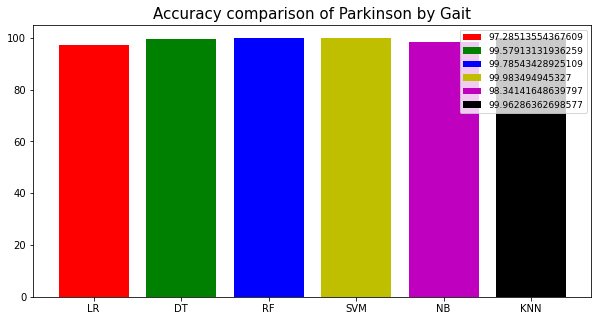

In [24]:
graph()

In [25]:

import tkinter
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np
root = tkinter.Tk()
root.wm_title("Accuracy plot for Parkinson disease by Gait")
fig = Figure(figsize=(10,10),dpi=1)
canvas = FigureCanvasTkAgg(fig, master=root)  
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
icon=tkinter.PhotoImage(file='gait.png')   
label=tkinter.Label(root,image=icon)
label.pack()
root.mainloop()